In [1]:
import talos as ta

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\chances\plots.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  Fi

In [2]:
r = ta.Reporting('./hasil/1layer.csv')

In [3]:
# get the number of rounds in the Scan
r.rounds()

205

In [4]:
# get the highest result ('val_acc' by default)
r.high()

0.8482629999999999

In [5]:
# get the highest result for any metric
r.high('acc')

0.977539886

In [6]:
# get the round with the best result
r.rounds2high('acc')

39

In [7]:
# get the best paramaters
r.best_params('acc')

array([[60, 32, 0, 20, 'lecun_normal', "<class 'keras.optimizers.Adam'>",
        '<function relu at 0x7f667712dd08>', 30, 0.001, 0],
       [50, 32, 0, 20, 'glorot_normal',
        "<class 'keras.optimizers.Adam'>",
        '<function relu at 0x7f667712dd08>', 30, 0.001, 1],
       [50, 32, 0, 20, 'he_uniform', "<class 'keras.optimizers.Adam'>",
        '<function relu at 0x7f667712dd08>', 30, 0.001, 2],
       [30, 32, 0, 20, 'he_uniform', "<class 'keras.optimizers.Adam'>",
        '<keras.layers.advanced_activations.LeakyReLU object at 0x00000196BD824358>',
        30, 0.001, 3],
       [60, 32, 0, 20, 'he_uniform', "<class 'keras.optimizers.Adam'>",
        '<keras.layers.advanced_activations.LeakyReLU object at 0x7fea1cfa91d0>',
        30, 0.001, 4],
       [40, 32, 0, 20, 'he_normal', "<class 'keras.optimizers.Adam'>",
        '<function relu at 0x7f667712dd08>', 30, 0.001, 5],
       [30, 32, 0, 20, 'he_normal', "<class 'keras.optimizers.Adam'>",
        '<function relu at 0x7f

In [8]:
# get correlation for hyperparameters against a metric
r.correlate('loss')

first_neuron    0.076879
batch_size     -0.188605
epochs               NaN
epochs2              NaN
dropout              NaN
lr              0.579192
Name: loss, dtype: float64

In [9]:
# get correlation for hyperparameters against a metric
r.correlate('acc')

first_neuron   -0.072235
batch_size      0.175972
epochs               NaN
epochs2              NaN
dropout              NaN
lr             -0.589301
Name: acc, dtype: float64

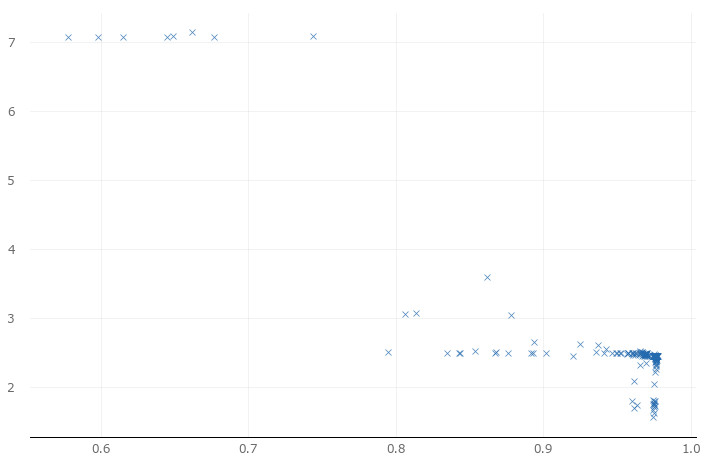

In [10]:
# a regression plot for two dimensions 
r.plot_regs('acc')

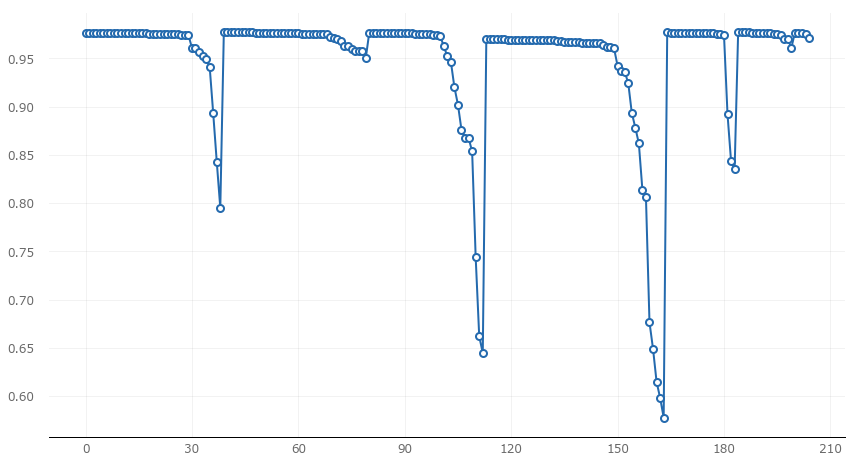

In [11]:
# line plot
r.plot_line('acc')

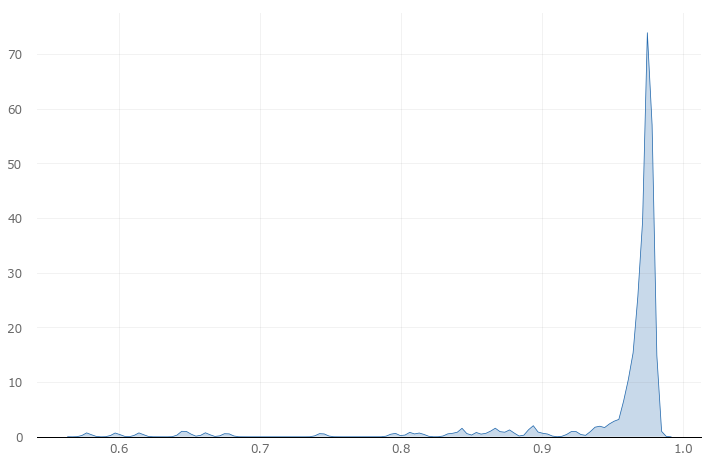

In [12]:
# up to two dimensional kernel density estimator
r.plot_kde('acc')

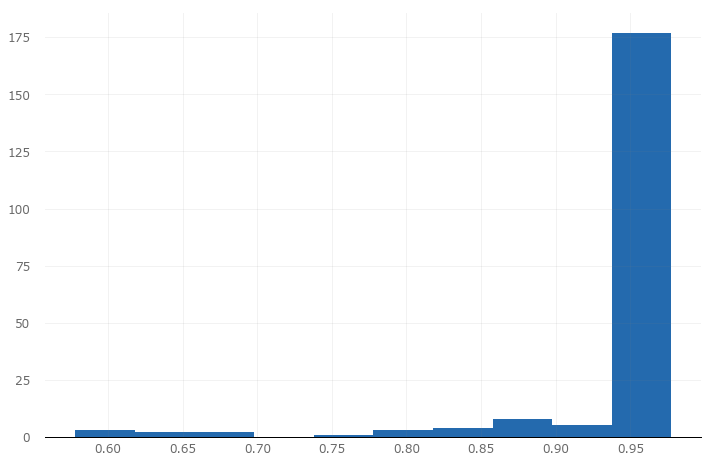

In [13]:

# a simple histogram
r.plot_hist('acc')

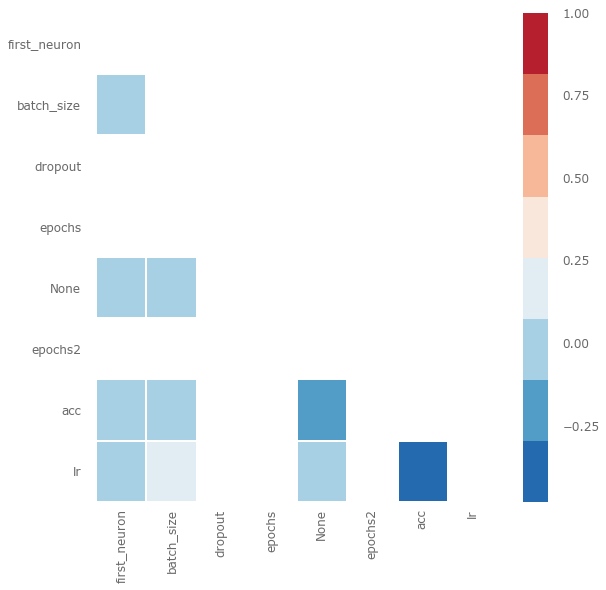

In [14]:
# heatmap correlation
r.plot_corr('acc')

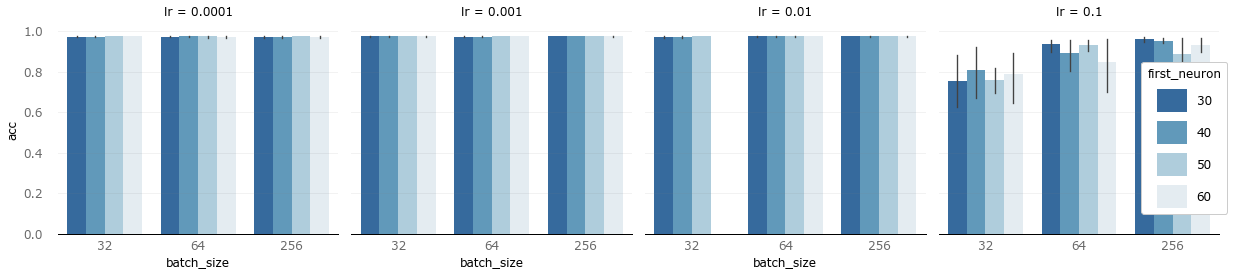

In [15]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'first_neuron', 'lr')


# Matrik Confusion

### Open Data

In [16]:
import numpy as np
def load_matrices(file_name):
    with open(file_name, 'rb') as f:
        A = np.load(f)
        B = np.load(f)
        C = np.load(f)
        D = np.load(f)
        E = np.load(f)
        F = np.load(f)
    return (A,B,C,D,E,F)

In [17]:
my_file =  '../CIDS-2018/10data2.npy'
train,test,y_train,y_test,ylabel_train, ylabel_test = load_matrices(my_file)

### Create Model

Karena pada best model fungsi aktivasi yang tersimpan sebagai 'lrelu', tidak dikenali pada saat load model maka model perludibuat secara manual. Bobot kemudian akan diload dari hasil terbaik. 


In [18]:
from keras.layers import Input,Dense
from keras.models import Model, Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import PReLU
from keras.models import load_model
#actvation leakyrelu
LR= LeakyReLU(0.01)
LR.__name__ = 'lrelu'

In [19]:
# load model
filepath='./hasil/best_1relu.hdf'
dnn=load_model(filepath)
dnn.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                915       
Total params: 5,775
Trainable params: 5,775
Non-trainable params: 0
_________________________________________________________________


In [20]:
##loading dnn untuk data 
# load weights

dnn.load_weights(filepath)
# Compile model (required to make predictions)
dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

result_train = dnn.evaluate(train,ylabel_train)
for name, value in zip(dnn.metrics_names, result_train):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_train[1]*100))

Created model and loaded weights from file
1619315/1619315 [==============================] - 65s 40us/step
loss 0.5236355723322949
acc 0.9519673442165728
acc: 95.20%


In [21]:
##prediksi data Train

preds = dnn.predict(train)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(ylabel_train, axis=1)

In [22]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
from sklearn.metrics import classification_report
outcomes = ['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS',
'DDOS attack-HOIC','DDOS attack-LOIC-UDP','DDoS attacks-LOIC-HTTP',
'DoS attacks-GoldenEye','DoS attacks-Hulk','DoS attacks-SlowHTTPTest','DoS attacks-Slowloris',
'FTP-BruteForce','Infilteration','SQL Injection','SSH-Bruteforce' ]
class_names=outcomes


target_names = ["Class {}".format(i) for i in range(15)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names, digits=5))
#print(classification_report(Y_test, y_predict))

                          precision    recall  f1-score   support

                  Benign    0.94268   0.99897   0.97001    803025
                     Bot    0.99908   0.99970   0.99939     85842
        Brute Force -Web    0.00000   0.00000   0.00000       496
        Brute Force -XSS    0.00000   0.00000   0.00000       187
        DDOS attack-HOIC    0.99993   1.00000   0.99997    192098
    DDOS attack-LOIC-UDP    0.92423   0.90455   0.91429      1362
  DDoS attacks-LOIC-HTTP    0.99529   0.99913   0.99721    161447
   DoS attacks-GoldenEye    0.99348   0.99956   0.99651     25008
        DoS attacks-Hulk    0.99957   0.99978   0.99967    138459
DoS attacks-SlowHTTPTest    0.75593   0.50922   0.60852     41974
   DoS attacks-Slowloris    0.99101   0.99985   0.99541      6612
          FTP-BruteForce    0.71256   0.88122   0.78796     58055
           Infilteration    0.00000   0.00000   0.00000     48347
           SQL Injection    0.00000   0.00000   0.00000        71
         

Confusion matrix, without normalization
[[802194     78      0      0      7      0    506     80     10      3
      53     13      0      0     81]
 [    26  85816      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [   473      0      0      0      0      0     23      0      0      0
       0      0      0      0      0]
 [   173      0      0      0      0      0     14      0      0      0
       0      0      0      0      0]
 [     0      0      0      0 192098      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0   1232    130      0      0      0
       0      0      0      0      0]
 [    40      0      0      0      0    101 161306      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0  24997      8      0
       3      0      0      0      0]
 [     0      0      0      0      0      0      0     31 138428      0
       0

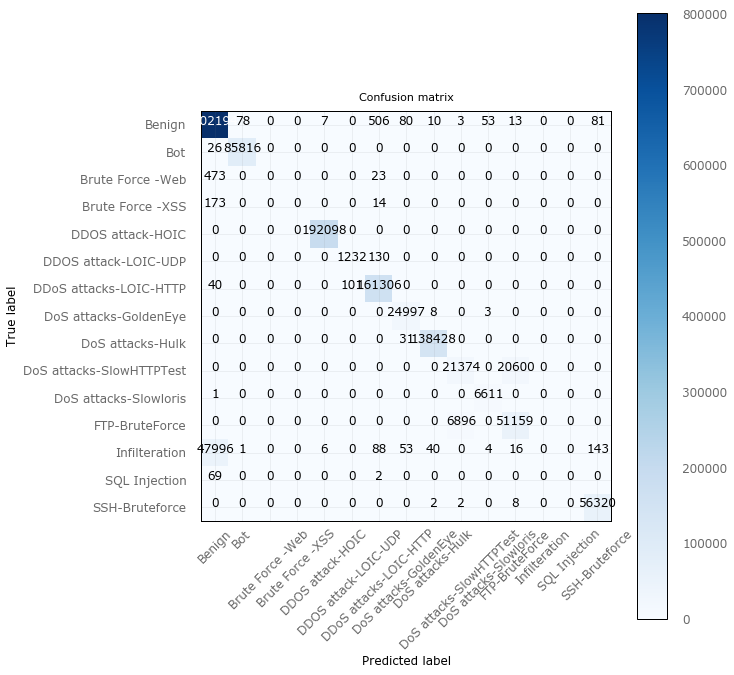

In [24]:
#outcomes = ['DoS', 'normal','Probe' ,'R2L', 'U2R']
class_names=outcomes


results = confusion_matrix(true_lbls, pred_lbls)
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))

## Data Test

In [25]:
#Data Test
result_test = dnn.evaluate(test,ylabel_test)
for name, value in zip(dnn.metrics_names, result_test):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_test[1]*100))

404836/404836 [==============================] - 16s 40us/step
loss 0.5154662774705078
acc 0.9523955379462301
acc: 95.24%


In [26]:
##prediksi data Train
#y_test=y_test.to_numpy()

preds = dnn.predict(test)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(ylabel_test, axis=1)

                          precision    recall  f1-score   support

                  Benign    0.94372   0.99876   0.97046    201238
                     Bot    0.99879   0.99967   0.99923     21479
        Brute Force -Web    0.00000   0.00000   0.00000       115
        Brute Force -XSS    0.00000   0.00000   0.00000        43
        DDOS attack-HOIC    0.99994   1.00000   0.99997     48006
    DDOS attack-LOIC-UDP    0.90080   0.91304   0.90688       368
  DDoS attacks-LOIC-HTTP    0.99482   0.99873   0.99677     40219
   DoS attacks-GoldenEye    0.99254   0.99935   0.99593      6123
        DoS attacks-Hulk    0.99948   0.99971   0.99960     34758
DoS attacks-SlowHTTPTest    0.75520   0.51259   0.61068     10484
   DoS attacks-Slowloris    0.98788   1.00000   0.99390      1630
          FTP-BruteForce    0.71280   0.87960   0.78746     14452
           Infilteration    0.00000   0.00000   0.00000     11892
           SQL Injection    0.00000   0.00000   0.00000        16
         

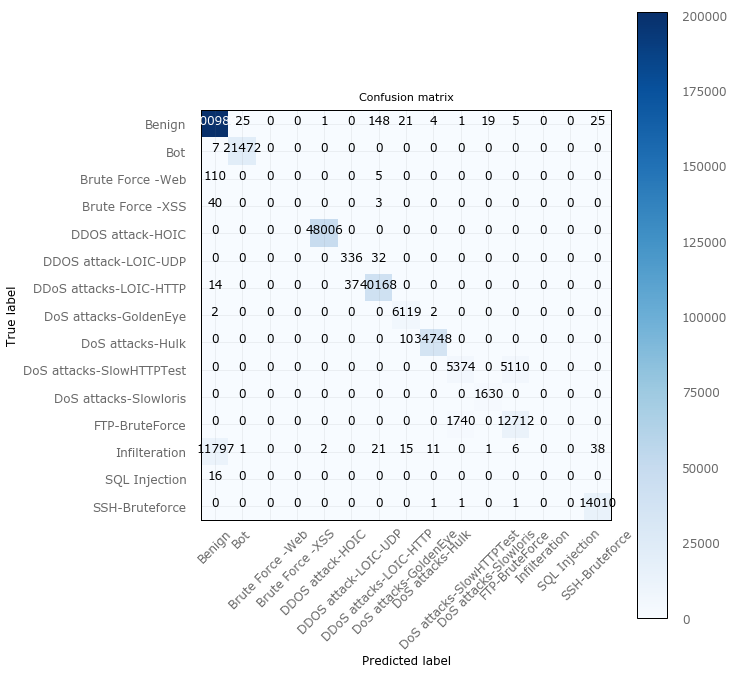

In [27]:
target_names = ["Class {}".format(i) for i in range(15)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names, digits=5))
#print(classification_report(Y_test, y_predict))

results = confusion_matrix(true_lbls, pred_lbls)
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))